<a href="https://colab.research.google.com/github/daotrananhtuan09102002/CS331.N12.KHCL/blob/main/Training_EfficientNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Prepare data

## Process UTK dataset to range age

In [ ]:
import os

In [ ]:
a = list(range(0,86,5))
b = list(zip(a, a[1:] + a[:1]))
b.pop()
b.pop(0)
b.insert(0, (1, 5))
b

[(1, 5),
 (5, 10),
 (10, 15),
 (15, 20),
 (20, 25),
 (25, 30),
 (30, 35),
 (35, 40),
 (40, 45),
 (45, 50),
 (50, 55),
 (55, 60),
 (60, 65),
 (65, 70),
 (70, 75),
 (75, 80),
 (80, 85)]

In [ ]:
!rm -r /content/new_utk_dataset/*

rm: cannot remove '/content/new_utk_dataset/*': No such file or directory


In [ ]:
for start, end in b:
    folder_name = f'{start}-{end-1}'
    print(folder_name)
    !mkdir /content/new_utk_dataset/$folder_name
!mkdir /content/new_utk_dataset/85+

1-4
5-9
10-14
15-19
20-24
25-29
30-34
35-39
40-44
45-49
50-54
55-59
60-64
65-69
70-74
75-79
80-84


In [ ]:
for folder in os.listdir('/content/new_utk_dataset'):
    if folder != '85+':
        print(folder)
        start, end = list(map(int, folder.split('-')))

        for i in range(start, end + 1):
            !cp -a /content/dataset/$i/. /content/new_utk_dataset/$folder
    else:
        for i in range(85, 90):
            !cp -a /content/dataset/$i/. /content/new_utk_dataset/$folder
        
        !cp -a /content/dataset/90+/. /content/new_utk_dataset/$folder
        pass
    # break

35-39
40-44
30-34
1-4
50-54
5-9
15-19
75-79
65-69
70-74
20-24
45-49
10-14
60-64
25-29
80-84
55-59


In [ ]:
num_of_images = []
for folder in os.listdir('/content/new_utk_dataset'):
    print(folder, end = ': ')
    old_sum = 0
    new_sum = 0

    if folder != '85+':
        start, end = list(map(int, folder.split('-')))

        # old_sum = sum([len(os.listdir(f'/content/dataset/{i}')) for i in range(start, end + 1)])
        new_sum = len(os.listdir(f'/content/new_utk_dataset/{folder}'))
        print(new_sum)
    else:
        # for i in range(85, 90):
        # old_sum += sum([len(os.listdir(f'/content/dataset/{i}')) for i in range(85, 90)])

        # old_sum += len(os.listdir(f'/content/dataset/90+'))

        new_sum = len(os.listdir(f'/content/new_utk_dataset/{folder}'))
        # print(old_sum == new_sum)
        print(new_sum)
    
    num_of_images.append(new_sum)
    # break

30-34: 2290
55-59: 954
60-64: 732
75-79: 326
65-69: 586
25-29: 5034
1-4: 2167
5-9: 895
40-44: 1181
80-84: 237
20-24: 2309
45-49: 1064
50-54: 1345
15-19: 942
70-74: 373
35-39: 2247
10-14: 589
85+: 436


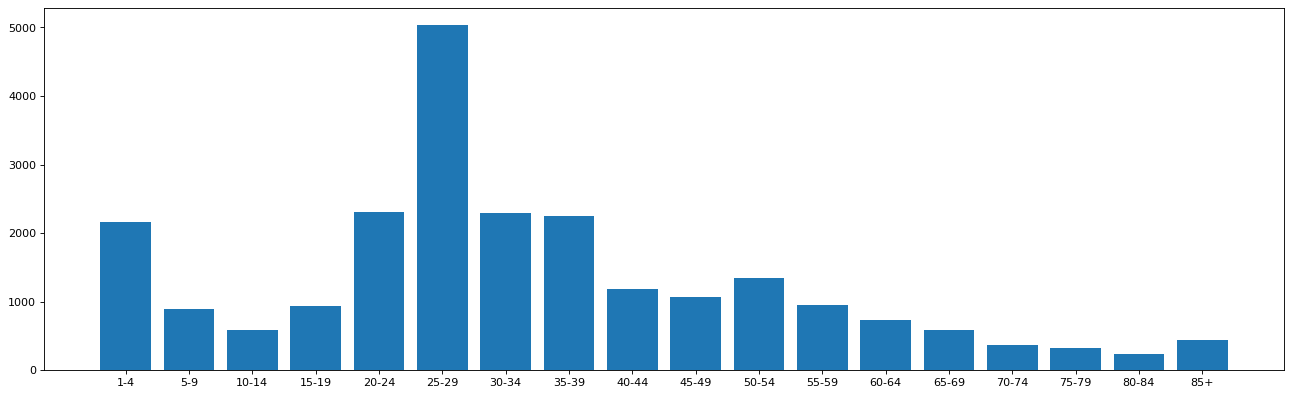

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

temp = sorted(zip(os.listdir('/content/new_utk_dataset'), num_of_images), key=lambda x: int(x[0].replace('+', '-').split('-')[0]))
age = [x[0] for x in temp]
count = [x[1] for x in temp] 

figure(figsize=(20, 6), dpi=80)
plt.bar(age, count)
plt.show()

In [ ]:
!zip -r /content/new_utk_dataset.zip new_utk_dataset/

# Training

## Unzip dataset

In [ ]:
!unrar x /content/drive/MyDrive/CS331_Project/augmentation_utk.rar

## Data preprocess

In [ ]:
import tensorflow as tf
# tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [ ]:
batch_size = 128
img_height = 224
img_width = 224

In [ ]:
data_dir = '/content/augmentation_utk'

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=0,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical'
)

Found 51654 files belonging to 18 classes.
Using 41324 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=0,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical'
)

Found 51654 files belonging to 18 classes.
Using 10330 files for validation.


In [ ]:
class_names = train_ds.class_names
class_names

['1-4',
 '10-14',
 '15-19',
 '20-24',
 '25-29',
 '30-34',
 '35-39',
 '40-44',
 '45-49',
 '5-9',
 '50-54',
 '55-59',
 '60-64',
 '65-69',
 '70-74',
 '75-79',
 '80-84',
 '85+']

## Calculate class weight

In [ ]:
from sklearn.utils import class_weight
from itertools import chain

y_train = []

for folder in os.listdir('/content/augmentation_utk/'):
    y_train.append([folder] * len(os.listdir('/content/augmentation_utk/' + folder)))

y_train = list(chain.from_iterable(y_train))

class_weights = class_weight.compute_class_weight(class_weight = 'balanced', classes = np.unique(y_train), y = y_train)

class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.6651985782722918,
 1: 1.6674414100329267,
 2: 1.0274495763217568,
 3: 0.6304188635032221,
 4: 0.5700569460998544,
 5: 0.6304188635032221,
 6: 0.6425585908344529,
 7: 0.8127065042952893,
 8: 0.9058291245791246,
 9: 1.078416635350119,
 10: 0.7143805493320057,
 11: 1.01222810111699,
 12: 1.3193869731800767,
 13: 1.6370032325537174,
 14: 2.5783168613357295,
 15: 2.961472308221534,
 16: 4.087844254510921,
 17: 2.2108371854134568}

## Visualize

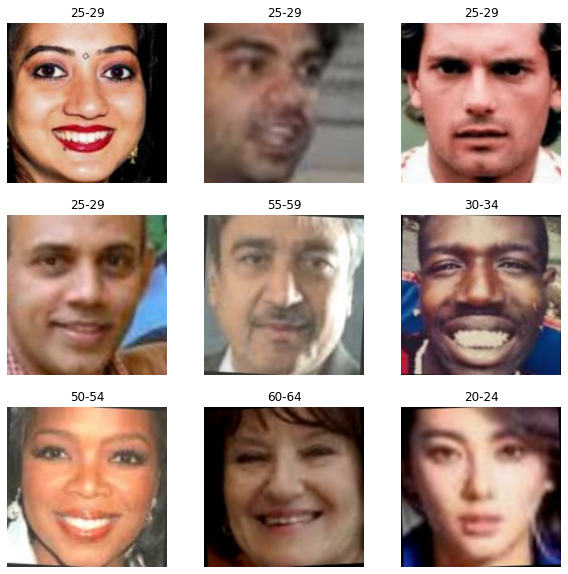

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
      for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")

## Configure the dataset for performance

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
# test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

## Build model

In [ ]:
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2B0

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [ ]:
base_model = EfficientNetV2B0 (
    input_shape=(224, 224, 3),
    include_top=False, 
    weights="imagenet"
)

base_model.trainable = False
base_model.summary()

24274472/24274472 [==============================] - 1s 0us/step
Model: "efficientnetv2-b0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  0           ['rescaling[0][0]']              
                                                                                                  
 stem_conv (Conv2

### More general building model function

In [ ]:
data_augmentation = Sequential(
    [
        layers.RandomRotation(factor=0.15),
        layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
        layers.RandomFlip(),
        layers.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
)

In [ ]:
def create_model(input_shape, n_classes, lr=1e-5):
    """
    Compiles a model integrated with VGG16 pretrained layers
    
    input_shape: tuple - the shape of input images (width, height, channels)
    n_classes: int - number of classes for the output layer
    optimizer: string - instantiated optimizer to use for training. Defaults to 'RMSProp'
    fine_tune: int - The number of pre-trained layers to unfreeze.
                If set to 0, all pretrained layers will freeze during training
    """
    inputs = tf.keras.Input(shape=input_shape)

    
    # Pretrained convolutional layers are loaded using the Imagenet weights.
    # Include_top is set to False, in order to exclude the model's fully-connected layers.
    conv_base = EfficientNetV2B0(include_top=False, weights='imagenet', input_shape=input_shape, input_tensor=inputs)
    conv_base.trainable = False

    x = layers.GlobalAveragePooling2D(name="avg_pool")(conv_base.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(n_classes, activation="softmax", name="pred")(x)

    # Compile
    model = tf.keras.Model(inputs, outputs, name="EfficientNetV2")
    
    # Group the convolutional base and new fully-connected layers into a Model object.
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Compiles the model for training.
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr, name='Adam'), 
                  loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
                  metrics=['accuracy'])
    
    return model

In [ ]:
model =  create_model((224,224,3), len(class_names), 1e-2)
model.summary()

24274472/24274472 [==============================] - 2s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  0           ['rescaling[0][0]']              
                                                                                                  
 stem_conv (Conv2D)          

In [ ]:
print('Number of layers: ', len(model.layers))
for i, layer in enumerate(model.layers):
    if layer.trainable:
        print(i, layer)

### Create callback function

In [ ]:
import datetime

date = datetime.datetime.now()

print('_'.join(date.strftime('%c').split(' ')))

weights_path = '/content/drive/MyDrive/CS331_Project/EfficientNet/EfficientNetV2_Adam_New'

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_accuracy',
                                                 mode = 'auto',
                                                 min_delta = 0.025,
                                                 patience = 2,
                                                 factor = 0.1,
                                                 verbose = 1,
                                                 cooldown = 0,
                                                 min_lr = 1e-9)

cb_early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    min_delta=0.025,
    verbose=1,
    mode='auto')

cb_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    f'{weights_path}/model.ckpt', 
    monitor='val_accuracy', 
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)
csv_logger = tf.keras.callbacks.CSVLogger(f'{weights_path}/training.log', append=True)

Sat_Nov_19_09:06:40_2022


### Transfer learning

In [ ]:
hist = model.fit(
    train_ds, 
    epochs=1000, 
    validation_data=val_ds, 
    class_weight=class_weights, 
    verbose=1, 
    callbacks=[cb_early_stopping, cb_checkpoint, reduce_lr, csv_logger]
)

Epoch 1/1000
323/323 [==============================] - ETA: 0s - loss: 2.8409 - accuracy: 0.2778
Epoch 1: val_accuracy improved from -inf to 0.34221, saving model to /content/drive/MyDrive/CS331_Project/EfficientNet/EfficientNetV2_Adam_New/model.ckpt
323/323 [==============================] - 100s 258ms/step - loss: 2.8409 - accuracy: 0.2778 - val_loss: 2.1490 - val_accuracy: 0.3422 - lr: 0.0100
Epoch 2/1000
323/323 [==============================] - ETA: 0s - loss: 2.2369 - accuracy: 0.3378
Epoch 2: val_accuracy improved from 0.34221 to 0.34501, saving model to /content/drive/MyDrive/CS331_Project/EfficientNet/EfficientNetV2_Adam_New/model.ckpt
323/323 [==============================] - 80s 244ms/step - loss: 2.2369 - accuracy: 0.3378 - val_loss: 2.1346 - val_accuracy: 0.3450 - lr: 0.0100
Epoch 3/1000
323/323 [==============================] - ETA: 0s - loss: 2.1903 - accuracy: 0.3488
Epoch 3: val_accuracy improved from 0.34501 to 0.37657, saving model to /content/drive/MyDrive/CS331

### Resume training

In [ ]:
del model

In [ ]:
# Training model from checkpoint
# model =  create_model((224,224,3), len(class_names), 1e-6, fine_tune=0)
model.load_weights( '/content/drive/MyDrive/CS331_Project/EfficientNet/EfficientNetV2_Adam_New/Fine_tuning/model.ckpt')

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  0           ['rescaling[0][0]']              
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 32  864         ['normalization[0][0]']      

In [ ]:
hist = model.fit(train_ds, epochs=1000, validation_data=val_ds, verbose=1, callbacks=[cb_early_stopping, cb_checkpoint])

### Fine tuning

In [ ]:
model.load_weights( f'{weights_path}/model.ckpt')

In [ ]:
import datetime

date = datetime.datetime.now()

print('_'.join(date.strftime('%c').split(' ')))

weights_path = '/content/drive/MyDrive/CS331_Project/EfficientNet/EfficientNetV2_Adam_New/Fine_tuning'

cb_early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=30,
    min_delta=1e-3,
    mode='auto'
)

cb_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    f'{weights_path}/model.ckpt', 
    monitor='val_accuracy', 
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor = 'val_accuracy',                                   
    min_delta = 0.001,
    patience = 5,
    factor = 0.1,
    verbose = 1,
    cooldown = 1,
    min_lr = 1e-8,
    mode='auto'
)

csv_logger = tf.keras.callbacks.CSVLogger(f'{weights_path}/training.log', append=True)

Sat_Nov_19_04:50:19_2022


In [ ]:
def unfreeze_model(model, lr=1e-4, no_unfreezed_layer=279):
    # We unfreeze the top 20 layers while leaving BatchNorm layers frozen
    for layer in model.layers[-no_unfreezed_layer:]:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr, name='Adam'), 
        loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
        metrics=['accuracy']
    )

In [ ]:
unfreeze_model(model)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  0           ['rescaling[0][0]']              
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 32  864         ['normalization[0][0]']      

In [ ]:
print('Number of layers: ', len(model.layers))
for i, layer in enumerate(model.layers):
    if layer.trainable:
        print(i, layer)

Number of layers:  274
0 <keras.engine.input_layer.InputLayer object at 0x7fa7f7d79690>
1 <keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x7fa7f7d79bd0>
2 <keras.layers.preprocessing.normalization.Normalization object at 0x7fa7f82a6310>
3 <keras.layers.convolutional.conv2d.Conv2D object at 0x7fa7f7d7dd10>
5 <keras.layers.core.activation.Activation object at 0x7fa7f7dc7390>
6 <keras.layers.convolutional.conv2d.Conv2D object at 0x7fa7f7d031d0>
8 <keras.layers.core.activation.Activation object at 0x7fa7f7d03750>
9 <keras.layers.convolutional.conv2d.Conv2D object at 0x7fa7f7d09090>
11 <keras.layers.core.activation.Activation object at 0x7fa7f7d14410>
12 <keras.layers.convolutional.conv2d.Conv2D object at 0x7fa7f7d06b10>
14 <keras.layers.convolutional.conv2d.Conv2D object at 0x7fa7f7d2d110>
16 <keras.layers.core.activation.Activation object at 0x7fa7f7c86d90>
17 <keras.layers.convolutional.conv2d.Conv2D object at 0x7fa7f7c7f750>
19 <keras.layers.regularization.dropout.D

In [ ]:
hist = model.fit(
    train_ds, 
    epochs=1000, 
    validation_data=val_ds, 
    class_weight=class_weights, 
    verbose=1, 
    callbacks=[cb_early_stopping, cb_checkpoint, reduce_lr, csv_logger]
)

Epoch 1/1000
323/323 [==============================] - ETA: 0s - loss: 0.6425 - accuracy: 0.9946
Epoch 1: val_accuracy improved from -inf to 0.86612, saving model to /content/drive/MyDrive/CS331_Project/EfficientNet/EfficientNetV2_Adam_New/model.ckpt
323/323 [==============================] - 272s 768ms/step - loss: 0.6425 - accuracy: 0.9946 - val_loss: 0.9836 - val_accuracy: 0.8661 - lr: 1.0000e-04
Epoch 2/1000
323/323 [==============================] - ETA: 0s - loss: 0.6470 - accuracy: 0.9939
Epoch 2: val_accuracy improved from 0.86612 to 0.87241, saving model to /content/drive/MyDrive/CS331_Project/EfficientNet/EfficientNetV2_Adam_New/model.ckpt
323/323 [==============================] - 248s 765ms/step - loss: 0.6470 - accuracy: 0.9939 - val_loss: 0.9564 - val_accuracy: 0.8724 - lr: 1.0000e-04
Epoch 3/1000
323/323 [==============================] - ETA: 0s - loss: 0.6459 - accuracy: 0.9941
Epoch 3: val_accuracy did not improve from 0.87241

Epoch 3: ReduceLROnPlateau reducing lea

# Plot history when complete

In [ ]:
import pandas as pd

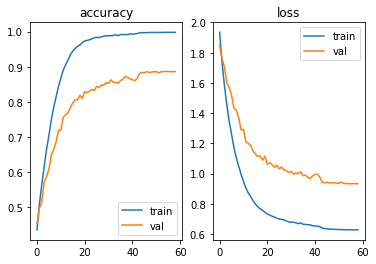

In [ ]:
his = pd.read_csv(f'/content/drive/MyDrive/CS331_Project/EfficientNet/EfficientNetV2_Adam_New/Fine_tuning/training.log')
plt.subplot(121)
plt.title('accuracy')
plt.plot(his['accuracy'])
plt.plot(his['val_accuracy'])
plt.legend(['train', 'val'])

plt.subplot(122)
plt.title('loss')
plt.plot(his['loss'],)
plt.plot(his['val_loss'])
plt.legend(['train', 'val'])

plt.show()

# Load best weight to evaluate

In [ ]:
def create_model(input_shape, n_classes, lr=1e-5, fine_tune=0):
    """
    Compiles a model integrated with VGG16 pretrained layers
    
    input_shape: tuple - the shape of input images (width, height, channels)
    n_classes: int - number of classes for the output layer
    optimizer: string - instantiated optimizer to use for training. Defaults to 'RMSProp'
    fine_tune: int - The number of pre-trained layers to unfreeze.
                If set to 0, all pretrained layers will freeze during training
    """
    inputs = tf.keras.Input(shape=input_shape)
    # x = data_augmentation(inputs)
    # x = preprocess_input(x)
    
    # Pretrained convolutional layers are loaded using the Imagenet weights.
    # Include_top is set to False, in order to exclude the model's fully-connected layers.
    conv_base = EfficientNetV2B0(include_top=False, weights='imagenet', input_shape=input_shape, input_tensor=inputs)
    
    # Defines how many layers to freeze during training.
    # Layers in the convolutional base are switched from trainable to non-trainable
    # depending on the size of the fine-tuning parameter.
    
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False
    
    x = conv_base(inputs)
    x = layers.GlobalAveragePooling2D(name="avg_pool")(x)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = 0.2
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)
    outputs = layers.Dense(n_classes, activation="softmax", name="pred")(x)

    # Compile
    model = tf.keras.Model(inputs, outputs, name="EfficientNetV2")
    
    # Group the convolutional base and new fully-connected layers into a Model object.
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # Compiles the model for training.
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr, name='Adam'), 
                  loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
                  metrics=[
                        tf.keras.metrics.TruePositives(name='tp'),
                        tf.keras.metrics.FalsePositives(name='fp'),
                        tf.keras.metrics.TrueNegatives(name='tn'),
                        tf.keras.metrics.FalseNegatives(name='fn'), 
                        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        tf.keras.metrics.Precision(name='precision'),
                        tf.keras.metrics.Recall(name='recall'),
                        tf.keras.metrics.AUC(name='auc'),
                        tf.keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
                    ]
    )
    
    return model

In [ ]:
model =  create_model((224,224,3), len(class_names), 1e-2, fine_tune=0)
model.summary()

24274472/24274472 [==============================] - 2s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Function  (None, 7, 7, 1280)       5919312   
 al)                                                             
                                                                 
 avg_pool (GlobalAveragePool  (None, 1280)             0         
 ing2D)                                                          
                                                                 
 batch_normalization (BatchN  (None, 1280)             5120      
 ormalization)                                                   
                                                                 
 top_dropout (Dropout)       (None, 1280)              0      

In [ ]:
model.load_weights( f'/content/drive/MyDrive/CS331_Project/EfficientNet/EfficientNetV2_Adam/Fine_tuning/model.ckpt')
model.trainable = False
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Function  (None, 7, 7, 1280)       5919312   
 al)                                                             
                                                                 
 avg_pool (GlobalAveragePool  (None, 1280)             0         
 ing2D)                                                          
                                                                 
 batch_normalization (BatchN  (None, 1280)             5120      
 ormalization)                                                   
                                                                 
 top_dropout (Dropout)       (None, 1280)              0         
                                                             

In [ ]:
model.evaluate(val_ds)

323/323 [==============================] - 22s 59ms/step - loss: 0.9520 - tp: 8394.0000 - fp: 763.0000 - tn: 174847.0000 - fn: 1936.0000 - accuracy: 0.9855 - precision: 0.9167 - recall: 0.8126 - auc: 0.9875 - prc: 0.9241


[0.9519521594047546,
 8394.0,
 763.0,
 174847.0,
 1936.0,
 0.9854845404624939,
 0.9166757464408875,
 0.8125846982002258,
 0.9874910712242126,
 0.9240801334381104]

1/1 [==============================] - 0s 26ms/step


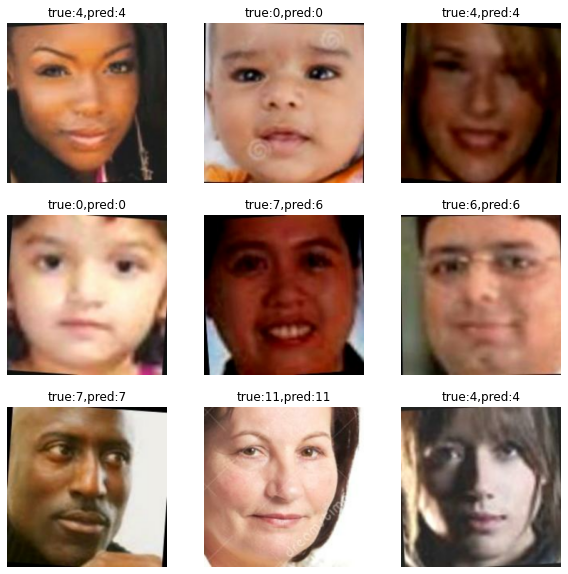

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
      for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        i_i = images[i].numpy().astype("uint8").reshape(1, 224, 224, 3)
        # y_i = preprocess_input(i_i)
        y_pred = class_names[np.argmax(model.predict(i_i))]
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f'true:{class_names[np.argmax(labels[i])]},pred:{y_pred}')
        plt.axis("off")

# Confusion matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools 

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/CS331_Project/EfficientNet/EfficientNetV2_Adam_New_Final')

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  0           ['rescaling[0][0]']              
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 32  864         ['normalization[0][0]']      

In [ ]:
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in val_ds:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model.predict(image_batch, verbose=0)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

In [ ]:
# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
y_true = tf.argmax(correct_labels, axis=1)

predicted_labels = tf.concat([item for item in y_pred], axis = 0)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#     plt.tight_layout()

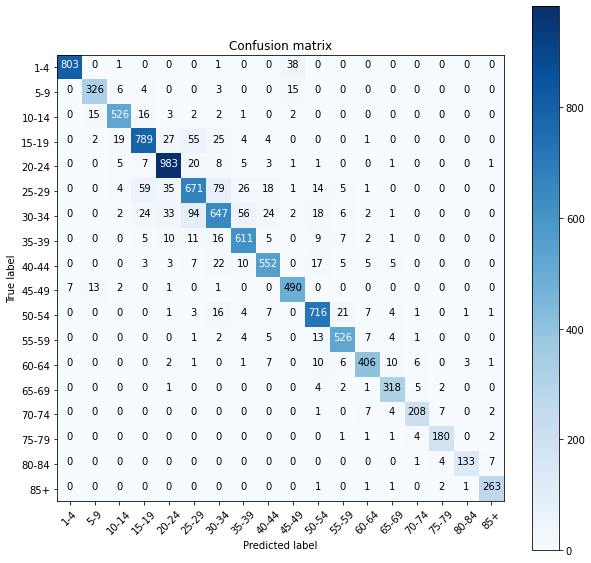

In [ ]:
cnf_matrix = confusion_matrix(y_true, predicted_labels)
plot_confusion_matrix(cnf_matrix, classes=sorted(class_names, key=lambda x: int(x.replace('+', '-').split('-')[0])), title='Confusion matrix')
plt.show()

In [ ]:
print(classification_report(y_true, predicted_labels, target_names=sorted(class_names, key=lambda x: int(x.replace('+', '-').split('-')[0]))))

              precision    recall  f1-score   support

         1-4       0.99      0.95      0.97       843
         5-9       0.92      0.92      0.92       354
       10-14       0.93      0.93      0.93       567
       15-19       0.87      0.85      0.86       926
       20-24       0.89      0.95      0.92      1035
       25-29       0.78      0.73      0.75       913
       30-34       0.79      0.71      0.75       909
       35-39       0.85      0.90      0.87       677
       40-44       0.88      0.88      0.88       629
       45-49       0.89      0.95      0.92       514
       50-54       0.89      0.92      0.90       782
       55-59       0.91      0.93      0.92       563
       60-64       0.92      0.90      0.91       453
       65-69       0.91      0.95      0.93       333
       70-74       0.92      0.91      0.91       229
       75-79       0.92      0.95      0.94       189
       80-84       0.96      0.92      0.94       145
         85+       0.95    

# Testing on one image

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array


In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/CS331_Project/InceptionV3')

1/1 [==============================] - 0s 79ms/step


Text(0.5, 1.0, 'pred:75-79')

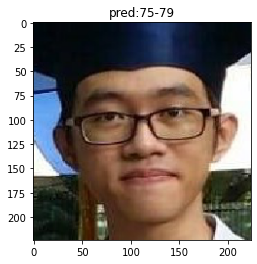

In [ ]:
# load an image from file
image = load_img('/content/drive/MyDrive/CS331_Project/Vinh_Troll.jpg', target_size=(224, 224))
plt.imshow(image)
image_array = img_to_array(image)
class_names = np.array(['1-4', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '5-9', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85+'])

# reshape data for the model
image_expaned = np.expand_dims(tf.keras.applications.inception_v3.preprocess_input(np.copy(image_array)), axis=0)

prediction = model.predict(image_expaned)
y_pred = class_names[np.argmax(prediction[0])]
plt.title(f'pred:{y_pred}')

# Save model and weight to download

In [ ]:
!pip install pyyaml h5py

In [ ]:
model.save('/content/EfficientNetV2_Adam_New')

In [ ]:
new_model = tf.keras.models.load_model('my_model')
new_model.summary()

In [ ]:
# !rm -r ./weight.tar.gz

In [ ]:
!tar -czf weight_v2.tar.gz ./model.ckpt

from IPython.display import FileLink



tar: ./model.ckpt: Cannot stat: No such file or directory
tar: Exiting with failure status due to previous errors


In [ ]:
FileLink(r'./weight_v2.tar.gz')

/kaggle/working/weight_v2.tar.gz